For explanations on boxplots, see:

   https://en.wikipedia.org/wiki/Box_plot
   
   http://www.r-graph-gallery.com/portfolio/boxplot/
   
   http://t-redactyl.io/blog/2016/04/creating-plots-in-r-using-ggplot2-part-10-boxplots.html

'data.frame':	78816 obs. of  16 variables:
 $ Date...Heure               : Factor w/ 78806 levels "2013-01-01T00:00:00+01:00",..: 652 692 656 662 655 660 686 649 663 647 ...
 $ Date                       : Factor w/ 1642 levels "2013-01-01","2013-01-02",..: 14 15 14 14 14 14 15 14 14 14 ...
 $ Heure                      : Factor w/ 48 levels "00:00","00:30",..: 28 20 32 38 31 36 14 25 39 23 ...
 $ Prod.totale..MW.           : int  83193 86233 81806 87139 82031 85283 78882 84483 88854 84489 ...
 $ Prod.thermique.fossile..MW.: int  10897 12354 11021 11363 10745 11395 9229 11370 11514 11310 ...
 $ Prod.fioul..MW.            : int  496 1166 500 486 502 487 559 495 486 496 ...
 $ Prod.charbon..MW.          : int  4583 4689 4695 4886 4515 4863 4629 4980 5037 5192 ...
 $ Prod.gaz..MW.              : int  5818 6499 5826 5991 5728 6045 4041 5895 5991 5622 ...
 $ Prod.hydraulique..MW.      : int  10933 12070 9278 13442 9770 11968 7962 11959 14666 12261 ...
 $ Prod.nucleaire..MW.        : int  58

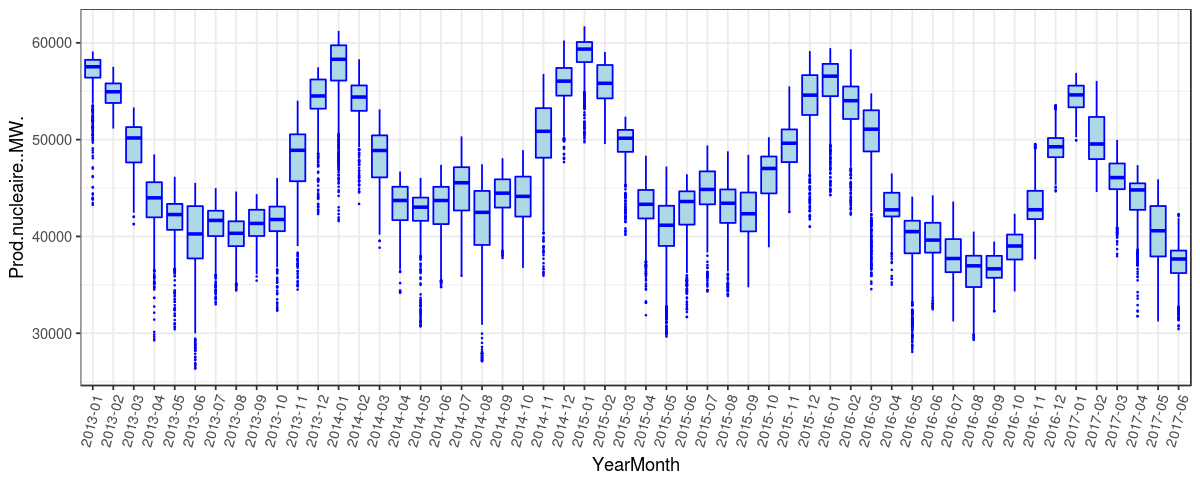

In [6]:
library(ggplot2)
library(scales)

ds = read.csv("cdc_prod_par_filiere.csv", sep = ";")
#summary(ds)
#str(ds)

ds$YearMonth <- substr(ds$Date, start=1, stop=7) 
ds$YearMonth <- factor(ds$YearMonth)
ds$Year <- substr(ds$Date, start=1, stop=4)

str(ds)

#ds <- ds[which(ds$Year=="2013" | ds$Year=="2014"),]

options(repr.plot.width=10, repr.plot.height=4)

ggplot(data=ds, aes(x=YearMonth, y=Prod.nucleaire..MW.))+
  geom_boxplot(fill = "lightblue", colour = "blue", outlier.size=0.1)+
  theme_bw()+
  theme(axis.text.x = element_text(angle = 75, hjust = 1))
  

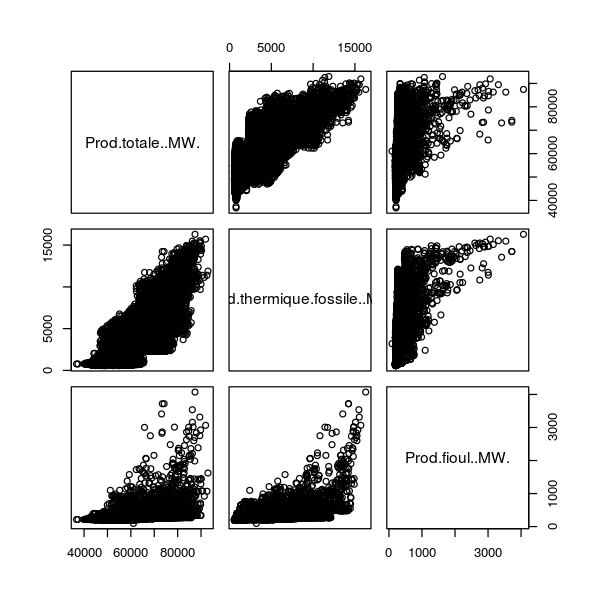

In [9]:
library(hexbin)
library(lattice)
ds = read.csv("cdc_prod_par_filiere.csv", sep = ";", nrow=10000)

bin<-hexbin(ds$Prod.nucleaire..MW., ds$Prod.eolien..MW., xbins=50) 

options(repr.plot.width=5, repr.plot.height=5)
#plot(bin)

pairs(ds[c(4,5,6)])

'data.frame':	394080 obs. of  6 variables:
 $ Date     : Factor w/ 1642 levels "2013-01-01","2013-01-02",..: 14 15 14 14 14 14 15 14 14 14 ...
 $ Heure    : Factor w/ 48 levels "00:00","00:30",..: 28 20 32 38 31 36 14 25 39 23 ...
 $ Prod     : num  58.8 58.9 58.8 58.9 58.8 ...
 $ Type     : Factor w/ 5 levels "Eol","Fos","Hyd",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ YearMonth: Factor w/ 54 levels "2013-01","2013-02",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year     : Factor w/ 5 levels "2013","2014",..: 1 1 1 1 1 1 1 1 1 1 ...


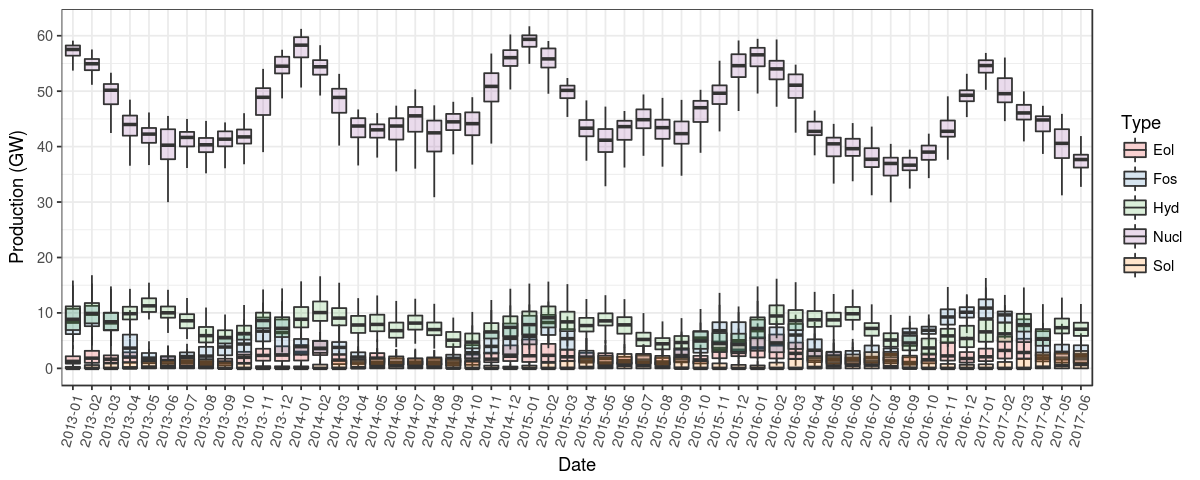

In [11]:
library(ggplot2)
library(scales)

ds = read.csv("cdc_prod_par_filiere.csv", sep = ";")

dsTot <- data.frame(ds$Date, ds$Heure, ds$Prod.totale..MW./10^3)
dsTot$Type <- "Tot"
colnames(dsTot) <- c("Date", "Heure", "Prod", "Type")
dsNucl <- data.frame(ds$Date, ds$Heure, ds$Prod.nucleaire..MW./10^3)
dsNucl$Type <- "Nucl"
colnames(dsNucl) <- c("Date", "Heure", "Prod", "Type")
dsEol <- data.frame(ds$Date, ds$Heure, ds$Prod.eolien..MW./10^3)
dsEol$Type <- "Eol"
colnames(dsEol) <- c("Date", "Heure", "Prod", "Type")
dsSol <- data.frame(ds$Date, ds$Heure, ds$Prod.solaire..MW./10^3)
dsSol$Type <- "Sol"
colnames(dsSol) <- c("Date", "Heure", "Prod", "Type")
dsHyd <- data.frame(ds$Date, ds$Heure, ds$Prod.hydraulique..MW./10^3)
dsHyd$Type <- "Hyd"
colnames(dsHyd) <- c("Date", "Heure", "Prod", "Type")
dsFos <- data.frame(ds$Date, ds$Heure, ds$Prod.thermique.fossile..MW./10^3)
dsFos$Type <- "Fos"
colnames(dsFos) <- c("Date", "Heure", "Prod", "Type")

newds <- rbind(dsNucl, dsEol, dsSol, dsHyd, dsFos)
newds$Type <- factor(newds$Type)
newds$YearMonth <- substr(newds$Date, start=1, stop=7) 
newds$YearMonth <- factor(newds$YearMonth)
newds$Year <- substr(ds$Date, start=1, stop=4)#as.numeric(substr(ds$Date, start=1, stop=4))
newds$Year <- factor(newds$Year)
str(newds)
#newds
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data=newds, aes(x=YearMonth, y=Prod, fill=Type))+
  geom_boxplot(outlier.size=0.1, alpha=0.2, position = "identity", outlier.shape = NA)+
  #stat_summary(fun.y="mean", geom="point")
  theme_bw()+
  theme(axis.text.x = element_text(angle = 75, hjust = 1)) +
  scale_fill_brewer(palette = "Set1") +
  scale_y_continuous(name = "Production (GW)",
                     breaks = seq(0, 100, length=11)) +
  scale_x_discrete(name = "Date")
  